In [ ]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

folder_v0 = 'output/multiple_times_v0'
folder_v1 = 'output/multiple_times_v1'

def read_times_from_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()

    times = []
    for line in lines:
        if 'Total time' in line:
            total_time = int(re.findall(r'\d+', line)[0])
        else:
            times.append(int(line.strip()))
    return times, total_time

def load_all_times(folder):
    files = sorted([f for f in os.listdir(folder) if f.startswith('times')])
    all_times = []
    total_times = []
    for file in files:
        path = os.path.join(folder, file)
        times, total = read_times_from_file(path)
        all_times.append(times)
        total_times.append(total)
    return all_times, total_times

v0_data, v0_totals = load_all_times(folder_v0)
v1_data, v1_totals = load_all_times(folder_v1)

v0_df = pd.DataFrame(v0_data)
v1_df = pd.DataFrame(v1_data)
v0_totals_series = pd.Series(v0_totals, name='Total Time v0')
v1_totals_series = pd.Series(v1_totals, name='Total Time v1')


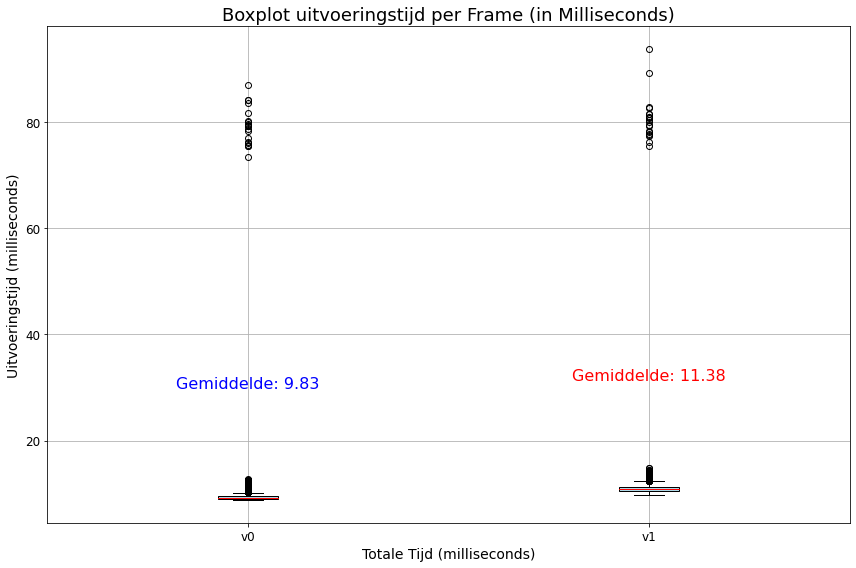

In [ ]:
# converteer van nanoseconds naar milliseconds (delen door 1,000,000)
v0_times_flat_milli = [time / 1000000 for time in v0_times_flat]
v1_times_flat_milli = [time / 1000000 for time in v1_times_flat]

mean_v0 = np.mean(v0_times_flat_milli)
mean_v1 = np.mean(v1_times_flat_milli)

plt.figure(figsize=(12, 8))
plt.boxplot([v0_times_flat_milli, v1_times_flat_milli], labels=['v0', 'v1'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'))

plt.text(1, mean_v0 + 20.05, f'Gemiddelde: {mean_v0:.2f}', horizontalalignment='center', color='blue', fontsize=16)
plt.text(2, mean_v1 + 20.05, f'Gemiddelde: {mean_v1:.2f}', horizontalalignment='center', color='red', fontsize=16)

plt.title('Boxplot uitvoeringstijd per Frame (in Milliseconds)', fontsize=18)
plt.xlabel('Versie (v0: CUDA zonder reductie vs v1: CUDA met reductie)', fontsize=14)
plt.ylabel('Uitvoeringstijd (milliseconds)', fontsize=14)

plt.tick_params(axis='both', labelsize=12)

plt.grid(True)
plt.tight_layout()

plt.show()



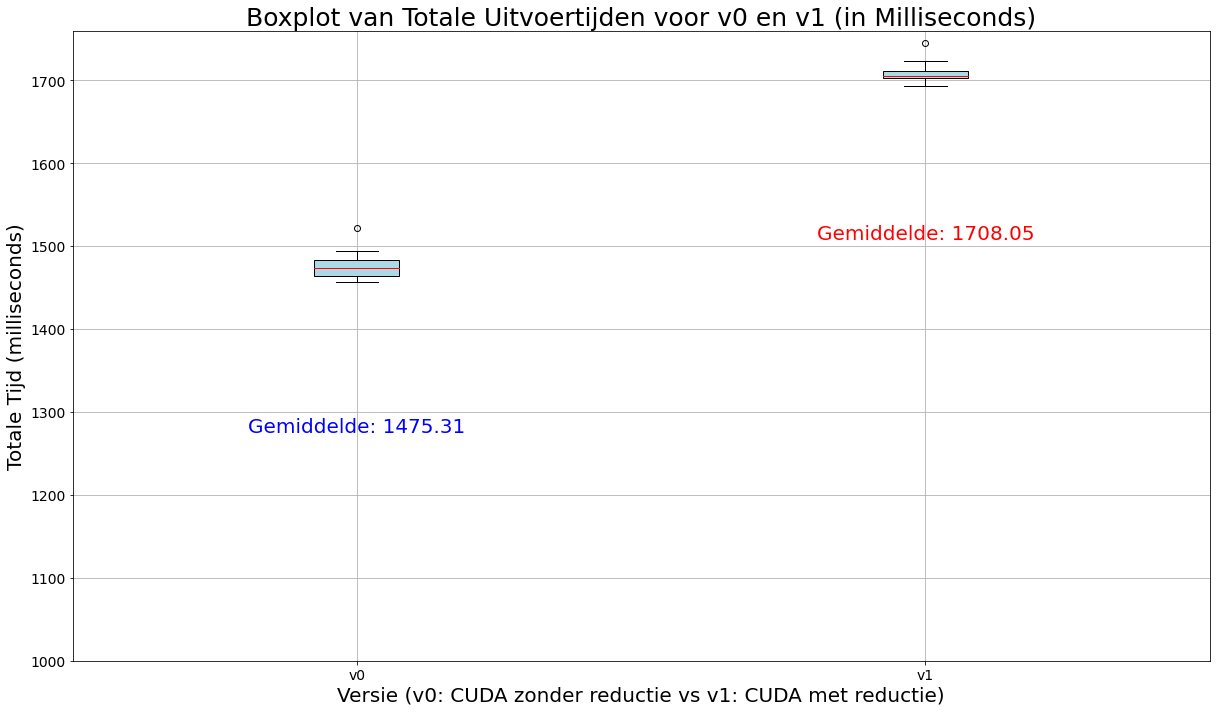

In [ ]:
v0_totals_ms = v0_totals_series / 1_000_000
v1_totals_ms = v1_totals_series / 1_000_000

mean_v0 = np.mean(v0_totals_ms)
mean_v1 = np.mean(v1_totals_ms)

plt.figure(figsize=(17, 10))
data = [v0_totals_ms, v1_totals_ms]
plt.boxplot(data, labels=['v0', 'v1'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'))

plt.text(1, mean_v0 - 200.05, f'Gemiddelde: {mean_v0:.2f}', horizontalalignment='center', color='blue', fontsize=20)
plt.text(2, mean_v1 - 200.05, f'Gemiddelde: {mean_v1:.2f}', horizontalalignment='center', color='red', fontsize=20)

plt.title('Boxplot van Totale Uitvoertijden voor v0 en v1 (in Milliseconds)', fontsize=25)
plt.xlabel('Versie (v0: CUDA zonder reductie vs v1: CUDA met reductie)', fontsize=20)
plt.ylabel('Totale Tijd (milliseconds)', fontsize=20)

plt.tick_params(axis='both', labelsize=14)

plt.ylim(bottom=1000)
plt.grid(True)

plt.tight_layout()
plt.show()


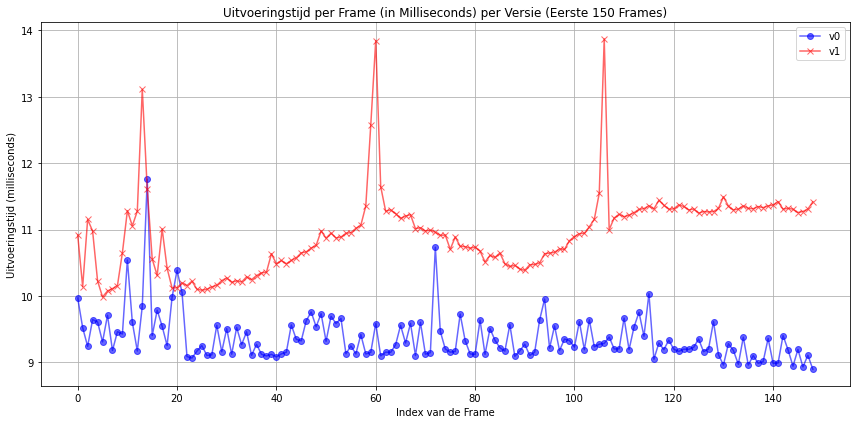

In [ ]:
v0_times_flat_milli = [time / 1000000 for time in v0_times_flat[1:150]]  # First 150 points
v1_times_flat_milli = [time / 1000000 for time in v1_times_flat[1:150]]  # First 150 points

plt.figure(figsize=(12, 6))

plt.plot(v0_times_flat_milli, label='v0', color='blue', marker='o', linestyle='-', alpha=0.6)
plt.plot(v1_times_flat_milli, label='v1', color='red', marker='x', linestyle='-', alpha=0.6)

plt.title('Uitvoeringstijd per Frame (in Milliseconds) per Versie (Eerste 150 Frames)')
plt.xlabel('Index van de Frame')
plt.ylabel('Uitvoeringstijd (milliseconds)')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()

